# Batch Processing Workflows

A batch workflow involves taking a job and breaking it down into a series of discrete tasks. As an example, consider the typical daily morning routine many people have for getting ready to go to work or school. A typical morning routine involves multiple tasks that must be executed in a certain order. The following is a list is a notional morning routine broken down into discrete tasks.

- Wake up
- Exercise
- Get out of bed
- Make bed
- Eat breakfast
- Brush teeth
- Take a shower
- Get dressed
- Comb hair
- Listen to a news podcast
- Lock the doors
- Drive to work
- Arrive at work

Some of these tasks depend on the successful execution of other tasks. All of these tasks depend on waking up in the morning. As such, waking up is the first task in the workflow. Other tasks have an obvious order. It makes logical sense that you would shower after exercising and that you would probably want to brush your teeth after you eat breakfast. Other task dependencies are less strict. You can listen to your news podcast any time after you wake up. Likewise, you can make your bed anytime before locking the doors and driving to work. 

Now that we have a series of tasks, we wanted to create a workflow that describes the dependencies between each task. Typically, we define a batch workflow in terms of a directed acyclic graph (DAG) of tasks. In computer science, a graph is a collection of nodes connected by vertices. In the case of a workflow, the nodes are tasks and the connections are task dependencies. 

Workflows are *directed* graphs because the task dependencies have a specific order In the morning routine example, the task *make bed* depends on completing the *get out of bed* task. The following show *undirected* and *directed* graphs representing the relationships between the two tasks. 

*Undirected Graph of Two Tasks*

[![Undirected Graph of Two Tasks](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBW01ha2UgQmVkXSAtLS0gQltHZXQgT3V0IG9mIEJlZF07XG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBW01ha2UgQmVkXSAtLS0gQltHZXQgT3V0IG9mIEJlZF07XG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ)

*Directed Graph of Two Tasks*

[![Directed Graph of Two Tasks](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVEQ7XG4gICAgQVtNYWtlIEJlZF0tLT5CW0dldCBPdXQgb2YgQmVkXTtcbiIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2V9)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVEQ7XG4gICAgQVtNYWtlIEJlZF0tLT5CW0dldCBPdXQgb2YgQmVkXTtcbiIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2V9)

Finally, workflows are *acyclic*, meaning that the workflow graph does not contain any loops. A loop occurs when two tasks mutually depend on each other. The instructions on many shampoo bottles, "lather, rinse, repeat", is an example of a cyclic workflow. If you literally followed these instructions, you would start by lathering your hair, then rinsing your hair, followed by repeating the cycle for all eternity. While any sane human being would stop this cycle at a certain point, computers tend to take such instructions quite literally. As a consequence, workflow engines avoid jobs with cyclic workflows. 


*Example of a Cyclic Workflow*

[![Lather, Rinse, Repeat](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVEQ7XG4gICAgTGF0aGVyLS0-Umluc2U7XG4gICAgUmluc2UtLT5MYXRoZXI7IiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVEQ7XG4gICAgTGF0aGVyLS0-Umluc2U7XG4gICAgUmluc2UtLT5MYXRoZXI7IiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)

With definitions out of the way, we can take our morning routine and define a DAG-based workflow. When describing the dependencies between tasks, we do not need to define every dependency between every task. For instance, we know that we need to wake up before we exercise and that we need to exercise before we shower. Therefore, we only need to define exercising as a dependency for showering and not waking up. We assume if exercising is a dependency for showering, then we will execute all of the tasks necessary for exercising before showering.

The following is the DAG corresponding to our morning routine workflow. 

[![DAG of Morning Routine](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVEQ7XG5BW1dha2UgVXBdLS0-QltHZXQgb3V0IG9mIEJlZF07XG5CLS0tPkNbRXhlcmNpc2VdO1xuQi0tPkRbTWFrZSBCZWRdO1xuQy0tPkVbVGFrZSBhIFNob3dlcl07XG5FLS0-RltHZXQgRHJlc3NlZF07XG5DLS0-R1tFYXQgQnJlYWtmYXN0XTtcbkctLT5IW0JydXNoIFRlZXRoXTtcbkYtLT5JW0NvbWIgSGFpcl07XG5CLS0-SltMaXN0ZW4gdG8gTmV3cyBQb2RjYXN0XTtcbkktLT5LW0xvY2sgdGhlIERvb3JzXTtcbkQtLT5LO1xuSC0tPks7XG5LLS0-TFtEcml2ZSB0byBXb3JrXTtcbkwtLT5NW0Fycml2ZSBhdCBXb3JrXTtcbkotLT5NOyIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2V9)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVEQ7XG5BW1dha2UgVXBdLS0-QltHZXQgb3V0IG9mIEJlZF07XG5CLS0tPkNbRXhlcmNpc2VdO1xuQi0tPkRbTWFrZSBCZWRdO1xuQy0tPkVbVGFrZSBhIFNob3dlcl07XG5FLS0-RltHZXQgRHJlc3NlZF07XG5DLS0-R1tFYXQgQnJlYWtmYXN0XTtcbkctLT5IW0JydXNoIFRlZXRoXTtcbkYtLT5JW0NvbWIgSGFpcl07XG5CLS0-SltMaXN0ZW4gdG8gTmV3cyBQb2RjYXN0XTtcbkktLT5LW0xvY2sgdGhlIERvb3JzXTtcbkQtLT5LO1xuSC0tPks7XG5LLS0-TFtEcml2ZSB0byBXb3JrXTtcbkwtLT5NW0Fycml2ZSBhdCBXb3JrXTtcbkotLT5NOyIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2V9)

## Assignment 6

Directed acyclic graphs (DAGs) are critical when designing both batch and streaming workflows. From Cookiecutter Data Science's section on [Analysis is a DAG](https://drivendata.github.io/cookiecutter-data-science/#analysis-is-a-dag): 

> Often in an analysis you have long-running steps that preprocess data or train models. If these steps have been run already (and you have stored the output somewhere like the data/interim directory), you don't want to wait to rerun them every time. 

DAG-based workflows are even more critical when multiple independent tasks use the output of a prior task. For example, an organization may want to build a single, clean dataset for use in building machine learning models. 

This assignment will design a simple workflow to build a dataset for use in training machine learning models. We make this dataset weekly based on demographics data from the Census, daily sales, and weather forecasts. 

The following are the task and dataset names and descriptions you will need to complete the assignment. 

***Tasks***

- **AggSalesTask**: Aggregate the weekly sales data. Task runs on the first day of a new week on data from the previous week. 
- **LatestDemoTask**: Extract demographics information for the store locations from the latest Census data. Task runs when there are updates to Census data.  
- **AggWeatherTask**: Aggregate the weekly weather for the store locations from the forecasts. Task runs on the first day of a new week on data from the previous week. 
- **ModelingDataTask**: Creates a dataset for use in building machine learning models. 

***Datasets***

- **SalesData[0-6]**: The sales data for each day of the week where `SalesData0` is data from Monday, `SalesData1` is from Tuesday, ending with `SalesData6` being the data from Sunday. 
- **ForecastData[0-6]**: The weather data for each day of the week where `ForecastData0` is data from Monday, `ForecastData1` is from Tuesday, ending with `ForecastData6` being the data from Sunday. 
- **LatestPUMSData**: The latest PUMS data.
- **LatestTigerData**: The latest Tiger data. 
- **LatestACSData**: The latest ACS Summary File data.
- **AggSalesData**: The aggregated sales data output from the `AggSalesTask`.
- **AggWeatherData**: The aggregated weather data output from the `AggWeatherTask`. 
- **LatestDemoData**: The latest demographics output from the `LatestDemoTask`.
- **ModelingData**: Dataset for use in building machine learning models. Output from the `ModelingDataTask`. 

### Assignment 6.1

There are multiple tools for creating and running DAG-based workflows including Python-focused tools such as [Paver](http://paver.github.io/paver/#), [Luigi](http://luigi.readthedocs.org/en/stable/index.html), [Airflow](https://airflow.apache.org/index.html), [Snakemake](https://snakemake.readthedocs.io/en/stable/), [Ruffus](http://www.ruffus.org.uk/), or [Joblib](https://pythonhosted.org/joblib/memory.html)). [Oozie](http://oozie.apache.org/) and [Azkaban](https://azkaban.github.io/) are other open source workflow tools focused on Hadoop. 

While these tools are helpful when implementing production workflows, we will not be using any of them in this assignment to avoid unnecessary complexity. Instead, we will design the workflow as DAG using the [NetworkX](https://networkx.org/documentation/stable/)  library. The [NetworkX tutorial](https://networkx.org/documentation/stable/tutorial.html) and [NetworkX introduction](https://networkx.org/documentation/stable/reference/introduction.html) provide helpful guides to working with graphs, nodes, and edges. 

We represent the overall workflow as a NetworkX [DiGraph](https://networkx.org/documentation/stable/reference/classes/digraph.html). We use *nodes* to define tasks and datasets and use *edges* to represent the relationship between tasks and datasets. Because a workflow is a directed graph, the edge direction is essential.  If an edge starts at a task and ends at a dataset, the dataset is an output of the task. If an edge starts at a dataset and ends at a task, the dataset is a task input. 

The following code creates the NetworkX-based workflow and defines variables for the tasks and datasets. You will use these variables when adding tasks, datasets, and their relationships to the workflow graph. 

In [1]:
import networkx as nx
from networkx import ancestors
from networkx import descendants
import matplotlib.pyplot as plt

# Represents the overall DAG workflow
workflow_graph = nx.DiGraph()

# Represents the task to aggregrate the weekly sales dataset
agg_sales_task = 'AggSalesTask'

# Represents the task to create the latest demographics dataset
latest_demo_task = 'LatestDemoTask'

# Represents the task to aggregrate the weekly weather dataset
agg_weather_task = 'AggWeatherTask'

# Represents the task to create the weekly modeling dataset
modeling_data_task = 'ModelingTask'

# Represents the latest ACS Summary File data
latest_acs_data = 'LatestACSData'

# Represents the latest PUMS data
latest_pums_data = 'LatestPUMSData'

# Represents the latest Tiger data
latest_tiger_data = 'LatestTigerData'

# Represents the sales data for each day
sales_data0 = 'SalesData0'
sales_data1 = 'SalesData1'
sales_data2 = 'SalesData2'
sales_data3 = 'SalesData3'
sales_data4 = 'SalesData4'
sales_data5 = 'SalesData5'
sales_data6 = 'SalesData6'

# A collection containing the weekly sales data
sales_data = [
    sales_data0,
    sales_data1,
    sales_data2,
    sales_data3,
    sales_data4,
    sales_data5,
    sales_data6
]

# Represents the forecast data for each day
forecast_data0 = 'ForecastData0'
forecast_data1 = 'ForecastData1'
forecast_data2 = 'ForecastData2'
forecast_data3 = 'ForecastData3'
forecast_data4 = 'ForecastData4'
forecast_data5 = 'ForecastData5'
forecast_data6 = 'ForecastData6'

# A collection containing the weekly forecast data
forecast_data = [
    forecast_data0,
    forecast_data1,
    forecast_data2,
    forecast_data3,
    forecast_data4,
    forecast_data5,
    forecast_data6
]

# Represents the aggregated sales dataset
agg_sales_data = 'AggSalesData'

# Represents the aggregated weather dataset
agg_weather_data = 'AggWeatherData'

# Represents the latest demographic dataset
latest_demo_data = 'LatestDemoData'

# Represents the weekly modeling dataset
modeling_data = 'ModelingData'

#### Assignment 6.1.a

Use `workflow_graph.add_node` to add the tasks and datasets to `workflow_graph`.  For task nodes, add the attribute `dtype='task'`. For dataset nodes, add the attribute `dtype='data'`.  The following is an example of adding `agg_sales_data` as a node with the attribute `dtype='data'`. 

```python
workflow_graph.add_node(agg_sales_data, dtype='data')
```

In [2]:
# TODO: Add the sales data nodes with dtype='data' attribute
for sale in sales_data:
    workflow_graph.add_node(sale, dtype='data')
# TODO: Add the forecast data nodes with dtype='data' attribute
for forecast in forecast_data:
    workflow_graph.add_node(forecast, dtype='data')
# TODO: Add the latest PUMS data node with dtype='data' attribute
workflow_graph.add_node(latest_pums_data, dtype='data')
# TODO: Add the latest ACS data node with dtype='data' attribute
workflow_graph.add_node(latest_acs_data, dtype='data')
# TODO: Add the latest Tiger data node with dtype='data' attribute
workflow_graph.add_node(latest_tiger_data, dtype='data')
# TODO: Add the aggregated sales data node with dtype='data' attribute
workflow_graph.add_node(agg_sales_data, dtype='data')
# TODO: Add the aggregated weather data node with dtype='data' attribute
workflow_graph.add_node(agg_weather_data, dtype='data')
# TODO: Add the latest demographic data node with dtype='data' attribute
workflow_graph.add_node(latest_demo_data, dtype='data')
# TODO: Add the modeling data node with dtype='data' attribute
workflow_graph.add_node(modeling_data, dtype='data')
# TODO: Add the aggregate sales task node with dtype='task' attribute
workflow_graph.add_node(agg_sales_task, dtype='task')
# TODO: Add the latest demographics data task node with dtype='task' attribute
workflow_graph.add_node(latest_demo_task, dtype='task')
# TODO: Add the aggregate weather task node with dtype='task' attribute
workflow_graph.add_node(agg_weather_task, dtype='task')
# TODO: Add the modeling data task node with dtype='task' attribute
workflow_graph.add_node(modeling_data_task, dtype='task')
# Prints the number of nodes and edges in the graph
print('Number of nodes: {}, Number of edges: {}'.format(
    len(workflow_graph.nodes), len(workflow_graph.edges)
))

Number of nodes: 25, Number of edges: 0


#### Assignment 6.1.b

Go through each task and add the dataset inputs and outputs. The following is an example of adding `sales_data0` as a dependency to `agg_sales_task`. 

```python
workflow_graph.add_edge(sales_data0, agg_sales_task)
```

In [3]:
# TODO: Add all the inputs for `agg_sales_task`
for sale in sales_data:
    workflow_graph.add_edge(sale, agg_sales_task)
# TODO: Add the output for `agg_sales_task`
workflow_graph.add_edge(agg_sales_task, agg_sales_data)
# TODO: Add all the inputs for `agg_weather_task`
for forecast in forecast_data:
    workflow_graph.add_edge(forecast, agg_weather_task)
# TODO: Add the output for `agg_weather_task`
workflow_graph.add_edge(agg_weather_task, agg_weather_data)
# TODO: Add all the inputs for `latest_demo_task`
for census_data in [latest_acs_data, latest_pums_data, latest_tiger_data]:
    workflow_graph.add_edge(census_data, latest_demo_task)
# TODO: Add the outputs for `latest_demo_task`
workflow_graph.add_edge(latest_demo_task, latest_demo_data)
# TODO: Add all the inputs for `modeling_data_task`
for model_data in [agg_sales_data, agg_weather_data, latest_demo_data]:
    workflow_graph.add_edge(model_data, modeling_data_task)
# TODO: Add the output for `modeling_data_task`
workflow_graph.add_edge(modeling_data_task, modeling_data)
# Prints the number of nodes and edges in the graph
print('Number of nodes: {}, Number of edges: {}'.format(
    len(workflow_graph.nodes), len(workflow_graph.edges)
))

Number of nodes: 25, Number of edges: 24


You can use `nx.draw(workflow_graph)` to draw the graph without labels. See [NetworkX's Gallery](https://networkx.org/documentation/stable/auto_examples/index.html) for more complicated drawing examples, including an example using [custom node icons](https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html#sphx-glr-auto-examples-drawing-plot-custom-node-icons-py). 

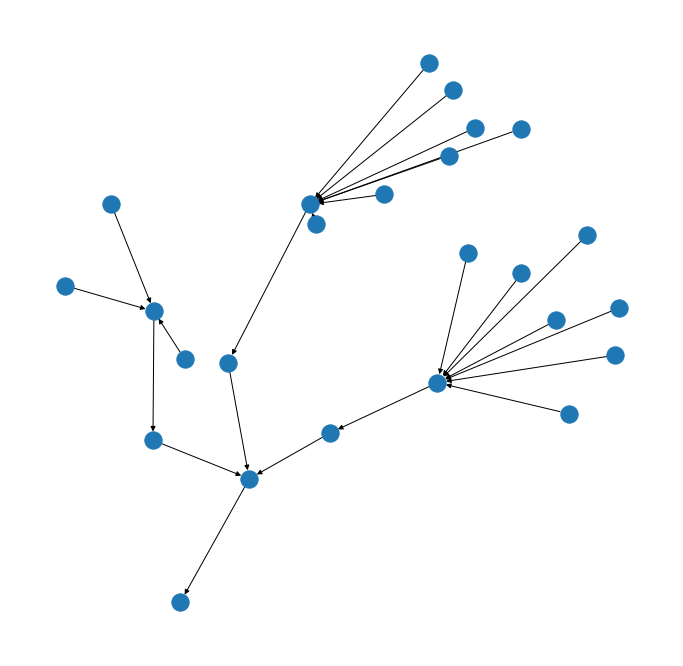

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(workflow_graph)

### Assignment 6.2

In the second part of the assignment, you will analyze the workflow graph using a few of NetworkX's built-in graph analysis algorithms. 

#### Assignment 6.2.a

Use the following code to check for cycles in your workflow. The code should output "Good Result: No cycles found in your workflow!" if your workflow does not have any cycles. 

In [5]:
# TODO: Run this code to check your workflow for cycles

if nx.is_directed_acyclic_graph(workflow_graph):
    print('Good Result: No cycles found in your workflow!')  
else:
    print('Bad Result: Cycles found in your workflow!')

Good Result: No cycles found in your workflow!


#### Assignment 6.2.b

Use the [ancestors](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.ancestors.html) function to examine the dependencies for creating the `agg_sales_data` dataset.  This function should output all the tasks and datasets necessary to build the `agg_sales_data` dataset.  

In [6]:
# TODO: Find all the dependencies for the aggregated sales dataset
agg_sales_data_deps = ancestors(workflow_graph,agg_sales_data)
agg_sales_data_deps

{'AggSalesTask',
 'SalesData0',
 'SalesData1',
 'SalesData2',
 'SalesData3',
 'SalesData4',
 'SalesData5',
 'SalesData6'}

#### Assignment 6.2.c

Use the [ancestors](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.ancestors.html) function to examine the dependencies for creating the `latest_demo_data` dataset.  This function should output the tasks and datasets necessary to build the `latest_demo_data` dataset.  

In [7]:
# TODO: Find all the dependencies for the latest demographics dataset
last_demo_data_deps = ancestors(workflow_graph,latest_demo_data)
last_demo_data_deps

{'LatestACSData', 'LatestDemoTask', 'LatestPUMSData', 'LatestTigerData'}

#### Assignment 6.2.d

Finally, use the [ancestors](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.ancestors.html) function to examine the dependencies for creating the `modeling_data` dataset. Filter the output so that it only includes nodes task nodes. You can use `workflow_graph.nodes.data()` to include the data when interating over all the nodes in the graph. The following code example prints the node name and the node's data dictionary. 

```python
for node_name, data_dict in workflow_graph.nodes.data():
    print(node_name, data_dict)
```

The following creates a set containing all the task nodes in the workflow. Use the `task_nodes` set when filtering the `modeling_data` dependencies.

In [8]:
for node_name, data_dict in workflow_graph.nodes.data():
    print(node_name, data_dict)

SalesData0 {'dtype': 'data'}
SalesData1 {'dtype': 'data'}
SalesData2 {'dtype': 'data'}
SalesData3 {'dtype': 'data'}
SalesData4 {'dtype': 'data'}
SalesData5 {'dtype': 'data'}
SalesData6 {'dtype': 'data'}
ForecastData0 {'dtype': 'data'}
ForecastData1 {'dtype': 'data'}
ForecastData2 {'dtype': 'data'}
ForecastData3 {'dtype': 'data'}
ForecastData4 {'dtype': 'data'}
ForecastData5 {'dtype': 'data'}
ForecastData6 {'dtype': 'data'}
LatestPUMSData {'dtype': 'data'}
LatestACSData {'dtype': 'data'}
LatestTigerData {'dtype': 'data'}
AggSalesData {'dtype': 'data'}
AggWeatherData {'dtype': 'data'}
LatestDemoData {'dtype': 'data'}
ModelingData {'dtype': 'data'}
AggSalesTask {'dtype': 'task'}
LatestDemoTask {'dtype': 'task'}
AggWeatherTask {'dtype': 'task'}
ModelingTask {'dtype': 'task'}


In [9]:
task_nodes = {
    node_name
    for node_name, data_dict in workflow_graph.nodes.data()
    if data_dict['dtype'] == 'task'
}

task_nodes

{'AggSalesTask', 'AggWeatherTask', 'LatestDemoTask', 'ModelingTask'}

In [10]:
# TODO: Find all the task dependencies for the modeling data set

modeling_data_task_deps = {
    node_name
    for node_name in ancestors(workflow_graph, modeling_data)
    if node_name in task_nodes}
modeling_data_task_deps

{'AggSalesTask', 'AggWeatherTask', 'LatestDemoTask', 'ModelingTask'}

#### Assignment 6.2.e

Finally, verify that there are no tasks or datasets in the workflow that depend on the `modeling_data` dataset using the [descendants](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.descendants.html#networkx.algorithms.dag.descendants) function. Using `descendants` on `modeling_data` should return an empty set. 

In [11]:
# TODO: Verify that there are no tasks or datasets in the workflow that depend on `modeling_data`

modeling_data_descendants = descendants(workflow_graph, modeling_data)
modeling_data_descendants

set()